In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [2]:
warnings.filterwarnings('always')
sick = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
print(sick.shape)

(5110, 12)


In [3]:
# deleting nan values and id column
sick = sick.dropna()
print(sick.shape)
sick = sick.drop(["id"], axis=1)

(4909, 12)


In [4]:
# making num values from str values
for i in sick.columns:
    if sick[i].dtype == "object":
        sick[i] = LabelEncoder().fit_transform(sick[i])

In [5]:
X = sick.drop(["stroke"], axis=1)
y = sick["stroke"]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X_std)

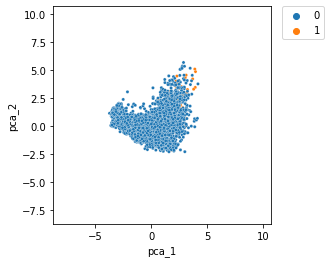

In [7]:
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label':y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [8]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_std)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


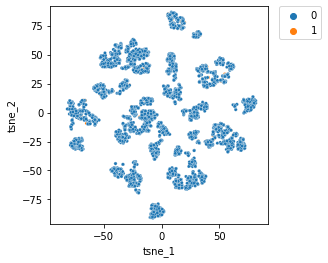

In [9]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)